In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---

The exam is structured as follows:
* Q1: Conceptual questions about machine learning $\Rightarrow$ 12 points
* Q2-Q13: Pandas questions $\Rightarrow$ 76 points
* Q14: Classification coding questions $\Rightarrow$ 12 points

---

### [Q1 6$\times$2=12 points]

Suppose you have points of two classes (white versus solid) laid out in a 2-dimensional feature space as shown below.
Each box contains the same number of points.

![diamonds2](diamonds2.png)

(a) What is the baseline accuracy on this dataset?

== FILL IN ==
Accuracy = 54.54%

(b) What is the accuracy of a depth-1 decision tree?

== FILL IN ==
Accuracy = 54.54%

(c) What is the accuracy of a depth-2 decision tree?

== FILL IN ==
Accuracy = 63.63%

(d) What is the accuracy of logistic regression?

== FILL IN ==
Accuracy = 72.72%

Now consider the following dataset.
![diamonds](diamonds.png)

(e) What is the best accuracy that can be achieved by a depth-1 decision tree?

== FILL IN ==
Accuracy = 63.63%

(f)  What is the best accuracy achievable by a depth-2 decision tree?

== FILL IN ==
Accuracy = 90.9%

--- 
We will work with a dataset of sales of wine/beer/etc. from the file *Warehouse_and_Retail_Sales.csv*.

### [Q2 3 points] Load in the file and print the first five rows.

In [3]:
import pandas as pd
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')
df.head(5)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
print(df.head(5))

   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0          

### [Q3 5 points] Plot the top-10 SUPPLIERs

Show a bar plot where the x-axis lists the top-10 SUPPLIERS, and y-axis is the number of rows with these SUPPLIERs.

In [5]:
suppliers_series = df['SUPPLIER'].value_counts()

<Axes: >

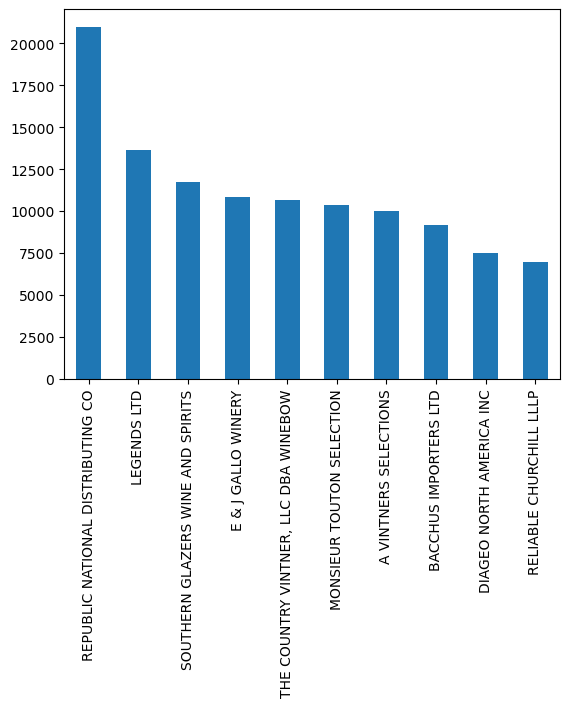

In [9]:
suppliers_series[:10].plot(kind = 'bar')

### [Q4 5 points] Missing SUPPLIERs

Consider only the rows where the SUPPLIER is missing.
Among these rows, what are the 3 most frequent ITEM DESCRIPTIONs?

In [22]:
missing_supply = df['SUPPLIER'].isna()

In [24]:
df[missing_supply]['ITEM DESCRIPTION'].value_counts()[:3]

WINE CREDIT              24
EMPTY WINE KEG - KEGS    23
BEER CREDIT              23
Name: ITEM DESCRIPTION, dtype: int64

### [Q5 5 points] Plot a histogram of ITEM CODE frequencies.

* The frequency of an ITEM CODE is the number of rows in which the ITEM CODE occurs.
* The x-axis of the historgram should be (bins of) frequency, and the y-axis is the number of ITEM CODEs whose frequency falls in that bin.

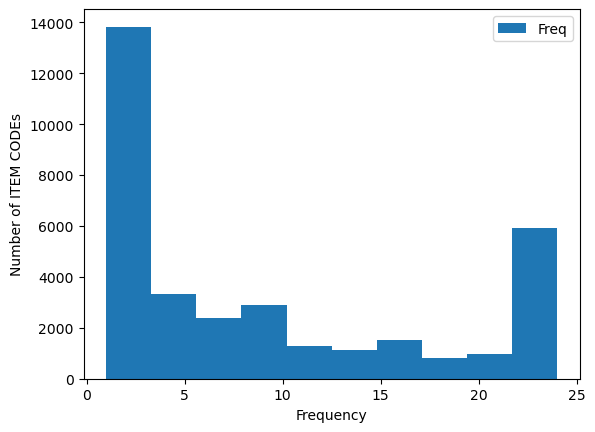

In [96]:
item_code_series = df['ITEM CODE'].value_counts()
item_code_series = item_code_series.to_frame()
item_code_series.reset_index(inplace = True)
item_code_series.rename(columns={"index": "ITEM CODE", "ITEM CODE": "Freq"} , inplace = True)


item_code_series.plot.hist(y='Freq', bins=10)
plt.xlabel('Frequency')
plt.ylabel('Number of ITEM CODEs')
plt.show()

### [Q6 5 points] Popular sizes

* The last word of each ITEM DESCRIPTION lists the size of the item.
    * For example, "BOOTLEG RED - 750ML" has a size of "750ML"
    * Sometimes, it may be "750ml" instead of "750ML". Convert all last-word strings to lowercase for the next step.
* Find the top-5 most frequently occurring sizes, and plot their frequencies.

In [50]:
df.head(5)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


750ml


<Axes: >

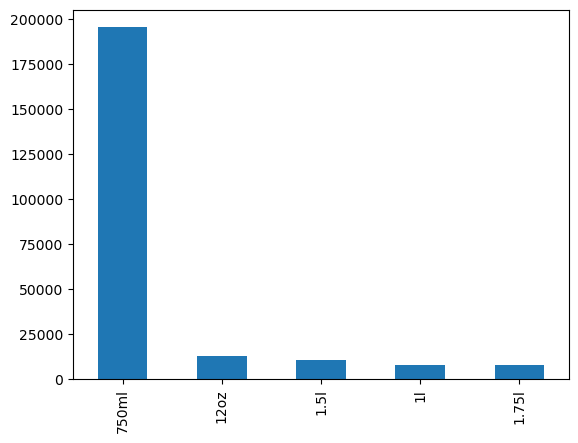

In [54]:
def last_element(x):
    aa = x.split(' - ')
    return aa[-1].lower()

print(last_element('MOMENT DE PLAISIR - 750ML'))
    
df['ITEM DESCRIPTION'].map(last_element).value_counts()[:5].plot(kind="bar")

### [Q7 5 points] Plot the top-10 most varied SUPPLIERs

* For each SUPPLIER, figure out the number of unique ITEM DESCRIPTIONs that they sell.
* Find the top-10 SUPPLIERs that sell the most unique items.
* Show a bar plot of these top-10 SUPPLIERs on the x-axis, and the number of unique items they sell on the y-axis.

<Axes: >

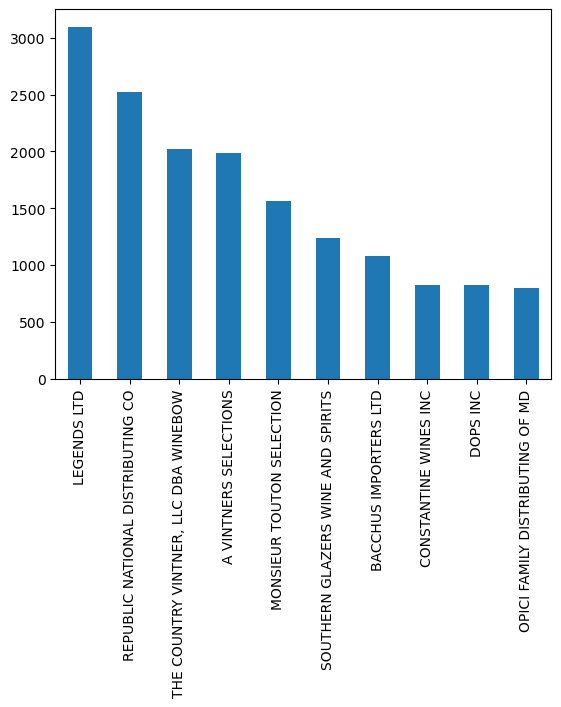

In [55]:
df2 = df[['SUPPLIER','ITEM DESCRIPTION']].copy().drop_duplicates()

df2['SUPPLIER'].value_counts()[:10].plot(kind = 'bar')

### [Q8 8 points] How many SUPPLIERs show up in every MONTH of every YEAR?

The data shows sales for several different months and years. Find the suppliers who appear throughout this time period.

In [113]:
df3 = df[['YEAR','MONTH','SUPPLIER']].copy().drop_duplicates()
no_of_months = len(df[['YEAR','MONTH']].drop_duplicates())
supp_count = df3['SUPPLIER'].value_counts()
print((supp_count ==no_of_months).sum())

187


In [125]:
supp_count[supp_count ==no_of_months ].head(187)

REPUBLIC NATIONAL DISTRIBUTING CO    24
E M D SALES INC                      24
MASS BAY BREWING CO                  24
C MONDAVI & SONS                     24
NICHE IMPORTERS                      24
                                     ..
SALVETO IMPORTS LLC                  24
DELMAR BREWING COMPANY LLC           24
UNITED STATES DISTILLED PRODUCTS     24
GRAPES OF SPAIN INC                  24
DEUTSCH FAMILY WINE & SPIRITS        24
Name: SUPPLIER, Length: 187, dtype: int64

### [Q9 8 points] Substitutable Suppliers

We will say that two SUPPLIERS "interact" in some (YEAR, MONTH) if there is some ITEM DESCRIPTION sold by both of them in that month and year.

* The number of interactions between two suppliers is the total number of (YEAR, MONTH) pairs where they have any such interaction.
    * For example, if suppliers ABC and XYZ both sell "BOOTLEG RED - 750ML" in month 1 of year 2020, then this counts as one interaction between ABC and XYZ. We say ABC and XYZ interacted in month 1 of 2020.
    * If ABC and XYZ both sold multiple items (say, "BOOTLEG RED - 750ML" and "MOMENT DE PLAISIR - 750ML") in month 1 of 2020, it still counts as one interaction. We still say ABC and XYZ interacted in month 1 of 2020.
    * If they both sold "BOOTLEG RED" in month 1 of 2020 and month 5 of 2022, that is two interactions.
    
Print out the top 4 pairs of SUPPLIERS with the most interactions.

In [129]:
df5 = df.groupby(['YEAR', 'MONTH', 'ITEM DESCRIPTION'])['SUPPLIER'].unique()

# Get all interactions for each group
inter = []
for supp in df5:
    n = len(supp)
    for i in range(n):
        for j in range(i+1, n):
            inter.append((supp[i], supp[j]))

# Count interactions
inter_cnt = pd.Series(inter).value_counts()

# Print top 4 pairs
print(inter_cnt.head(4))

(SUTTER HOME WINERY INC, REPUBLIC NATIONAL DISTRIBUTING CO)         13
(CONSTANTINE WINES INC, OPICI FAMILY DISTRIBUTING OF MD)             7
(GROTH VINEYARDS & WINERY, THE COUNTRY VINTNER, LLC DBA WINEBOW)     6
(DMV DISTRIBUTING LLC, TRI-VIN IMPORTS)                              5
dtype: int64


### [Q10 8 points] Big Suppliers

* For each SUPPLIER, calculate the total RETAIL SALES, WAREHOUSE SALES, and the sum of these two.
* Find the top-10 SUPPLIERS based on sum of the two.
* For these suppliers, print out whether RETAIL SALES is higher or WAREHOUSE SALES is higher.

In [134]:
df6 = pd.DataFrame()
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')

def f(x):
    if x['RETAIL SALES'] >x['WAREHOUSE SALES']:
        return 'RETAIL'
    else:
        return 'WAREHOUSE'

df6['RETAIL SALES'] = df.groupby('SUPPLIER')['RETAIL SALES'].sum()
df6['WAREHOUSE SALES'] = df.groupby('SUPPLIER')['WAREHOUSE SALES'].sum()
df6['SUM SALES']  = df6['WAREHOUSE SALES']  + df6['RETAIL SALES'] 
df6['HIGHER SALES'] = df6.T.apply(f)

df6.sort_values(by='SUM SALES',ascending=False)[:10]

,RETAIL SALES,WAREHOUSE SALES,SUM SALES,HIGHER SALES
SUPPLIER,,,,
CROWN IMPORTS,84437.66,1651871.51,1736309.17,WAREHOUSE
MILLER BREWING COMPANY,87156.44,1425428.71,1512585.15,WAREHOUSE
ANHEUSER BUSCH INC,109960.82,1331170.84,1441131.66,WAREHOUSE
HEINEKEN USA,56139.91,829796.46,885936.37,WAREHOUSE
E & J GALLO WINERY,166170.53,197463.78,363634.31,WAREHOUSE
DIAGEO NORTH AMERICA INC,145343.20,170564.63,315907.83,WAREHOUSE
CONSTELLATION BRANDS,131664.79,119399.51,251064.30,RETAIL
BOSTON BEER CORPORATION,40129.13,191592.89,231722.02,WAREHOUSE
YUENGLING BREWERY,23027.70,134147.86,157175.56,WAREHOUSE


### [Q11 8 points] Find all ITEM DESCRIPTIONs which show up sometimes as *WINE* and sometimes as *KEGS* in the ITEM TYPE.

In [144]:
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')
df2 = df[df['ITEM TYPE'].isin(['WINE', 'KEGS'])]
df3 = df2.groupby('ITEM DESCRIPTION')['ITEM TYPE'].unique()
match = df3[df3.apply(lambda x: 'WINE' in x and 'KEGS' in x)].index

print(match.tolist())

['JAM SANGRIA RED - 1/6 KEG', 'VINO PETITE PINOT GRIGIO - 20L']


### [Q12 8 points] Retail sales timeline

Show a plot where the x-axis is each month from June 2017 until September 2020, and the y-axis is the total of RETAIL SALEs for each month.

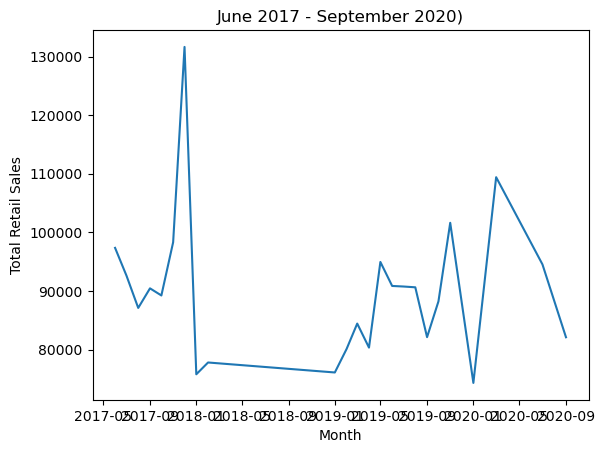

In [121]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
mask1 = df['DATE'] >= '2017-06-01'
mask2 = df['DATE'] <= '2020-09-30'
df5 = df[mask1 & mask2]
sales = df5.groupby('DATE')['RETAIL SALES'].sum()


plt.plot(sales.index, sales.values)
plt.xlabel('Month')
plt.ylabel('Total Retail Sales')
plt.title('June 2017 - September 2020)')
plt.show()

### [Q13 8 points] Suppliers of funky items

For each SUPPLIER, consider the following two numbers:

* n1: the number of unique ITEM DESCRIPTIONs sold by this SUPPLIER
* n2: the number of unique ITEM DESCRIPTIONS **only** sold by this SUPPLIER (i.e., no other SUPPLIER sells these ITEMs)

Among all SUPPLIERs for whom n1 is at least 1000, find the top-5 SUPPLIERS ordered by the ratio *n2/n1*. Print out the names of these 5 SUPPLIERs along with their ratios.

In [131]:
x1 = df.groupby('SUPPLIER')['ITEM DESCRIPTION'].nunique()

supp_every_item = df.groupby('ITEM DESCRIPTION')['SUPPLIER'].unique()

items_one_supplier = supp_every_item[supp_every_item.apply(len) == 1]
items_one_supplier = items_one_supplier.explode()

x2 = items_one_supplier.value_counts()
x2 = x2.reindex(x1.index, fill_value=0)

mask = x1[x1 >= 1000]
rt_supp = x2.loc[mask.index] / mask
print(rt_supp.sort_values(ascending=False).head(5))

SUPPLIER
LEGENDS LTD                          0.989341
MONSIEUR TOUTON SELECTION            0.947503
REPUBLIC NATIONAL DISTRIBUTING CO    0.822549
BACCHUS IMPORTERS LTD                0.792435
SOUTHERN GLAZERS WINE AND SPIRITS    0.787561
dtype: float64


---

### [Q14 12 points] Logistic Regression
We will analyze a dataset called *gyro_acc.csv*.
Each row records information from body sensors, alongside a timestamp and an "Activity" (walking or standing; encoded as 0/1).

We want to use **Logistic Regression** predict Activity using all the other features **except timestamp**.
* Split the data into 70%-train, 30%-test set.
* Calculate the *training* accuracy of the baseline classifier.
* Train a logistic regression classifier, and print its training and test accuracy.
* Which feature is found to be the most important feature?

In [135]:
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


df = pd.read_csv('gyro_acc.csv')

df['target'] = df['Activity']

formula = ''

In [137]:
for column in df.columns:
    if (column in ['target','timestamp', 'Activity']):
        pass
    else:
        if formula == '':
            formula = 'Q(\'' + column + '\')'
        else:
            formula = formula + ' + Q(\'' + column + '\')'

formula = 'target ~ 0 +' + formula

formula

"target ~ 0 +Q('accX') + Q('accY') + Q('accZ') + Q('gyroX') + Q('gyroY') + Q('gyroZ')"

In [139]:
Y,X = dmatrices(formula,df, return_type = 'dataframe')
y = Y['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [140]:
from sklearn import metrics
prediction_on_baseline = np.ones(len(y_test))
accuracy_bl = metrics.accuracy_score(y_test, prediction_on_baseline)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

prediction_train = model.predict(X_train)
accuracy_train = metrics.accuracy_score(y_train, prediction_train)
prediction_test = model.predict(X_test)
accuracy_test= metrics.accuracy_score(y_test, prediction_test)

In [142]:
print('Baseline Accuracy:')
print(accuracy_bl)
print('training accuracy:')
print(accuracy_train)
print('Test accuracy:')
print(accuracy_test)

Baseline Accuracy:
0.6770428015564203
training accuracy:
0.7848206839032527
Test accuracy:
0.8190661478599222
